# Here is the summary of major ML models implemented for the iris dataset
### Models evaluated:

- LogisticRegression

- DecisionTreeClassifier

- KNeighborsClassifier

- LinearDiscriminantAnalysis

- GaussianNB

- SVC

- RandomForestClassifier

- Neural Network MLPClassifier

In [142]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [143]:
from __future__ import absolute_import 
from __future__ import division 
from __future__ import print_function 

In [144]:
from sklearn.model_selection import train_test_split
import pandas
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [163]:
# Load dataset
df = sns.load_dataset("iris")
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [146]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [147]:
# descriptions
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [169]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

# Correlation Map

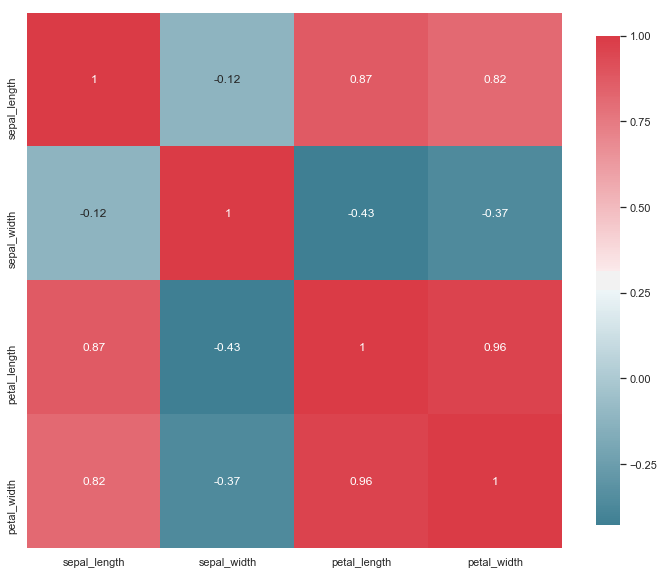

In [170]:
plot_correlation_map( df.drop('species', axis=1) )

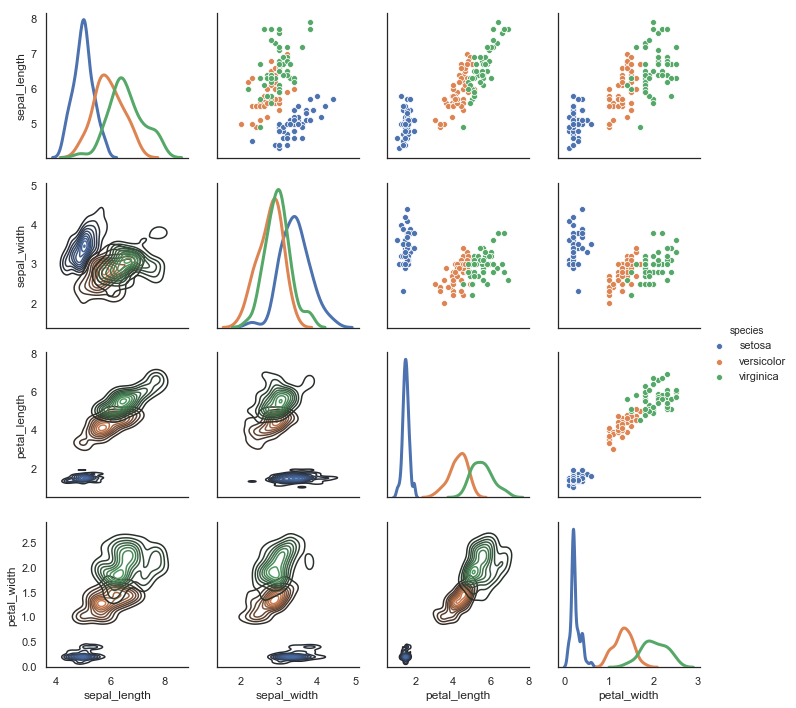

In [148]:
%matplotlib inline
sns.set(style="white")
g = sns.PairGrid(df, diag_sharey=False,hue="species")
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
g = g.add_legend()

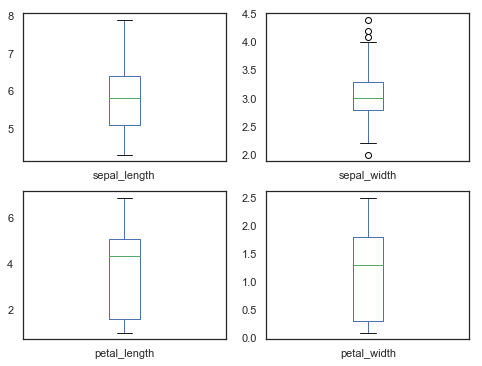

In [149]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(8,6))
plt.show()

In [150]:
features = df.drop('species', axis=1)
labels = df['species']

# split in two segments
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=51)

# and now split the 40% into half
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=51)

#### The regularization $\lambda$ and other parameters such as max depth and n_estimator need to be carefully using GridSearchCV fine tuned

In [151]:
models = []
models.append(('Logistic Regressor', LogisticRegression(C=1,solver='liblinear', multi_class='ovr')))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Support Vector Machine', SVC(gamma='auto')))
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=50, max_depth=4)))
models.append(('Multi-Perceptron NN', MLPClassifier(activation='relu',learning_rate='invscaling',hidden_layer_sizes=200)))

In [152]:
# evaluate each model in turn
seed = 7
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regressor: 0.900000 (0.116003)
Linear Discriminant Analysis: 0.977778 (0.044444)
KNN: 0.966667 (0.050918)
Decision Tree Classifier: 0.988889 (0.033333)
Gaussian NB: 0.988889 (0.033333)
Support Vector Machine: 0.966667 (0.050918)
Random Forest Classifier: 0.966667 (0.050918)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Multi-Perceptron NN: 0.988889 (0.033333)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


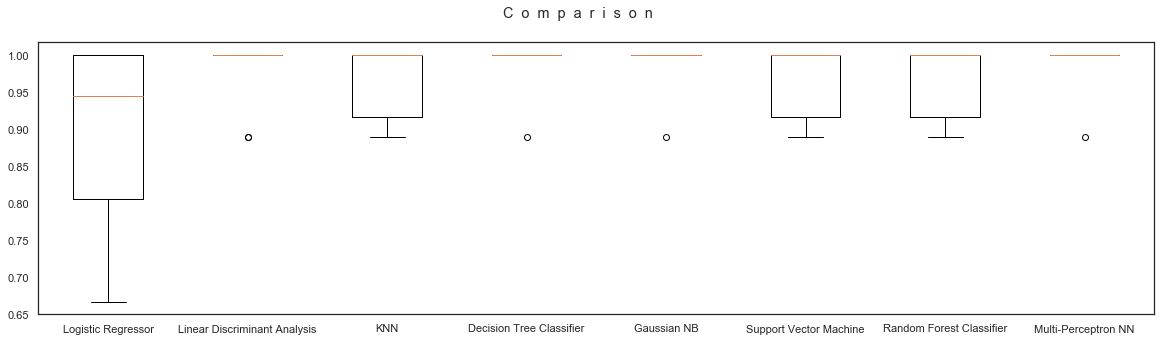

In [164]:
# Compare Algorithms
fig = plt.figure(figsize=(20,5))
fig.suptitle('C  o  m  p  a  r  i  s  o  n')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Classification Report

In [156]:
for name, model in models:
    # fit
    print(name)
    predictions = model.predicat(X_val)
    print(classification_report(y_val, predictions),'\n')

Logistic Regressor
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.77      0.87        13
   virginica       0.80      1.00      0.89        12

   micro avg       0.90      0.90      0.90        30
   macro avg       0.93      0.92      0.92        30
weighted avg       0.92      0.90      0.90        30
 

Linear Discriminant Analysis
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
 

KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       0.87      1.00      0.93        13
   virginica       

# Confusion Matrix

In [161]:

for name, model in models:
    # fit
    print(name) 
    predictions = model.predict(X_val)
    print(confusion_matrix(y_val, predictions),'\n')

Logistic Regressor
[[ 5  0  0]
 [ 0 10  3]
 [ 0  0 12]] 

Linear Discriminant Analysis
[[ 5  0  0]
 [ 0 13  0]
 [ 0  1 11]] 

KNN
[[ 5  0  0]
 [ 0 13  0]
 [ 0  2 10]] 

Decision Tree Classifier
[[ 5  0  0]
 [ 0 12  1]
 [ 0  3  9]] 

Gaussian NB
[[ 5  0  0]
 [ 0 12  1]
 [ 0  3  9]] 

Support Vector Machine
[[ 5  0  0]
 [ 0 12  1]
 [ 0  0 12]] 

Random Forest Classifier
[[ 5  0  0]
 [ 0 12  1]
 [ 0  3  9]] 

Multi-Perceptron NN
[[ 5  0  0]
 [ 0 12  1]
 [ 0  0 12]] 



# Accuracy Score

In [158]:
for name, model in models:
    # fit
    print(name) 
    predictions = model.predict(X_val)
    print(round(accuracy_score(y_val, predictions),4),'\n')

Logistic Regressor
0.9 

Linear Discriminant Analysis
0.9667 

KNN
0.9333 

Decision Tree Classifier
0.8667 

Gaussian NB
0.8667 

Support Vector Machine
0.9667 

Random Forest Classifier
0.8667 

Multi-Perceptron NN
0.9667 

